In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori  #apriori算法
from mlxtend.frequent_patterns import association_rules  #计算关联规则的函数

In [5]:
data_wine1 = pd.read_csv("./datamining_dataset/winemag-data_first150k.csv")
data_wine2 = pd.read_csv("./datamining_dataset/winemag-data-130k-v2.csv")

data_wine = pd.concat([data_wine1,data_wine2],axis = 0,ignore_index=True)

In [6]:
data_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude


In [7]:
df = data_wine[ (data_wine.designation=='Reserve') & (data_wine.country=='Australia') ][['price','variety','winery']]
#利用get_dummies()方法转换成适合进行关联规则挖掘的形式
df = pd.get_dummies(df) 
df = df.drop('price' ,1)

In [8]:
df.head()

,variety_Cabernet Sauvignon,variety_Cabernet Sauvignon-Shiraz,variety_Chardonnay,variety_Durif,variety_Merlot,variety_Pinot Grigio,variety_Pinot Noir,variety_Riesling,variety_Sauvignon Blanc,variety_Shiraz,...,winery_Stonier,winery_Syan,winery_Tahbilk,winery_Tall Poppy,winery_Temple Bruer,winery_Tyrrell's,winery_Warrabilla,winery_Wise,winery_Yellow Tail,winery_Yering Station
8492,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9917,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11386,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14878,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
frequent_itemsets = apriori(df,use_colnames=True, min_support=0.025)
frequent_itemsets

,support,itemsets
0,0.151685,[variety_Cabernet Sauvignon]
1,0.275281,[variety_Chardonnay]
2,0.095506,[variety_Pinot Noir]
3,0.067416,[variety_Riesling]
4,0.286517,[variety_Shiraz]
5,0.033708,[variety_Shiraz-Viognier]
6,0.033708,[winery_Green Point]
7,0.028090,[winery_Henry's Drive Vignerons]
8,0.202247,[winery_Jacob's Creek]
9,0.028090,[winery_Passing Clouds]


In [10]:
#导出关联规则，计算支持度和置信度，并使用lift、leverage、conviction指标对规则进行评价，设置lift 最小值为1.25
rules =  association_rules(frequent_itemsets, metric='lift', min_threshold=1.25)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(winery_Penley Estate),(variety_Cabernet Sauvignon),0.044944,0.151685,0.044944,1.000000,6.592593,0.038126,inf
1,(variety_Cabernet Sauvignon),(winery_Penley Estate),0.151685,0.044944,0.044944,0.296296,6.592593,0.038126,1.357185
2,(winery_Tahbilk),(variety_Cabernet Sauvignon),0.039326,0.151685,0.028090,0.714286,4.708995,0.022125,2.969101
3,(variety_Cabernet Sauvignon),(winery_Tahbilk),0.151685,0.039326,0.028090,0.185185,4.708995,0.022125,1.179009
4,(winery_Yering Station),(variety_Pinot Noir),0.123596,0.095506,0.056180,0.454545,4.759358,0.044376,1.658240
5,(variety_Pinot Noir),(winery_Yering Station),0.095506,0.123596,0.056180,0.588235,4.759358,0.044376,2.128411
6,(winery_Jacob's Creek),(variety_Riesling),0.202247,0.067416,0.044944,0.222222,3.296296,0.031309,1.199037
7,(variety_Riesling),(winery_Jacob's Creek),0.067416,0.202247,0.044944,0.666667,3.296296,0.031309,2.393258
8,(variety_Shiraz),(winery_Henry's Drive Vignerons),0.286517,0.028090,0.028090,0.098039,3.490196,0.020042,1.077553
9,(winery_Henry's Drive Vignerons),(variety_Shiraz),0.028090,0.286517,0.028090,1.000000,3.490196,0.020042,inf


In [11]:
#对挖掘结果进行分析：将lift值大于6的降序输出
rules[(rules.lift>6)].sort_values(by=['lift'], ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(variety_Shiraz-Viognier),(winery_Yering Station),0.033708,0.123596,0.033708,1.000000,8.090909,0.029542,inf
12,(winery_Yering Station),(variety_Shiraz-Viognier),0.123596,0.033708,0.033708,0.272727,8.090909,0.029542,1.328652
0,(winery_Penley Estate),(variety_Cabernet Sauvignon),0.044944,0.151685,0.044944,1.000000,6.592593,0.038126,inf
1,(variety_Cabernet Sauvignon),(winery_Penley Estate),0.151685,0.044944,0.044944,0.296296,6.592593,0.038126,1.357185


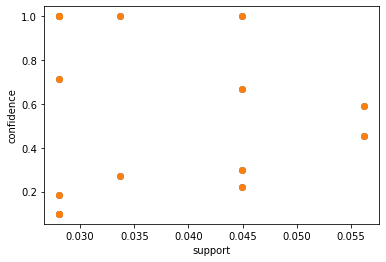

In [13]:
#可视化展示：绘制关联规则支持度和置信度的散点图
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(rules.support,rules.confidence)
plt.show()

In [14]:
df1=data_wine[ (data_wine.variety=='Shiraz-Viognier')  ][['price','country','winery']]
df1.head(5)

,price,country,winery
7636,125.0,Australia,Torbreck
10512,225.0,Australia,Torbreck
15814,23.0,Australia,Off the Leash.
19943,20.0,Australia,Wirra Wirra
20180,18.0,Australia,Domaine Terlato & Chapoutier


In [15]:
for index,i in enumerate(df1.price.values):
    if i>=10.0 and i <30.0:
        df1.iat[index,0]=5
    elif i>=30.0 and i <50.0:
        df1.iat[index,0]=4
    elif i>=50.0 and i <100.0:
        df1.iat[index,0]=3
    elif i>=100.0 and i <200.0:
        df1.iat[index,0]=2
    else:
        df1.iat[index,0]=1

In [16]:
class_mapping = {5: 'D', 4: 'C',3: 'B',2: 'A',1: 'S'}
price_level=df1.price.map(class_mapping)
df1=pd.concat([df1,price_level],axis = 1)

In [17]:
df1.columns = ['price_float', 'country', 'winery', 'price_level']
df1.head(10)

,price_float,country,winery,price_level
7636,2.0,Australia,Torbreck,A
10512,1.0,Australia,Torbreck,S
15814,5.0,Australia,Off the Leash.,D
19943,5.0,Australia,Wirra Wirra,D
20180,5.0,Australia,Domaine Terlato & Chapoutier,D
20306,5.0,Australia,Gemtree,D
20580,4.0,Australia,De Bortoli,C
20775,5.0,Australia,De Bortoli,D
21271,5.0,Australia,Innocent Bystander,D
21772,5.0,Australia,Yalumba,D


In [18]:
df1=df1.drop('price_float',1)

In [19]:
#将price一列离散化后的数据如下
df1.head(10)

,country,winery,price_level
7636,Australia,Torbreck,A
10512,Australia,Torbreck,S
15814,Australia,Off the Leash.,D
19943,Australia,Wirra Wirra,D
20180,Australia,Domaine Terlato & Chapoutier,D
20306,Australia,Gemtree,D
20580,Australia,De Bortoli,C
20775,Australia,De Bortoli,D
21271,Australia,Innocent Bystander,D
21772,Australia,Yalumba,D


In [20]:
#利用get_dummies()方法转换成适合进行关联规则挖掘的形式
df1=pd.get_dummies(df1)
df1.head(10)

,country_Australia,country_New Zealand,country_South Africa,country_US,winery_5OS Project,winery_Alkoomi,winery_Angove's,winery_Battle of Bosworth,winery_Bilancia,winery_Creed of Barossa,...,winery_Wirra Wirra,winery_Woop Woop,winery_Yalumba,winery_Yarra Yering,winery_Yering Station,price_level_A,price_level_B,price_level_C,price_level_D,price_level_S
7636,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10512,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15814,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19943,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
20180,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20306,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20580,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20775,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21772,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
pd.options.display.max_colwidth=100
#导出频繁项集，设置最小支持度为0.05
frequent_itemsets1 = apriori(df1,use_colnames=True, min_support=0.05)
frequent_itemsets1

,support,itemsets
0,0.930233,[country_Australia]
1,0.062016,[winery_De Bortoli]
2,0.069767,[winery_Domaine Terlato & Chapoutier]
3,0.062016,[winery_Hugh Hamilton]
4,0.054264,[winery_Innocent Bystander]
5,0.054264,[winery_Kangarilla Road]
6,0.100775,[winery_Torbreck]
7,0.085271,[winery_Yalumba]
8,0.069767,[winery_Yering Station]
9,0.054264,[price_level_A]


In [22]:
#导出关联规则，计算支持度和置信度，并使用lift、leverage、conviction指标对规则进行评价，设置lift 最小值为1.5
rules1 =  association_rules(frequent_itemsets1, metric='lift', min_threshold=1.5)
rules1

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(price_level_D),(winery_Domaine Terlato & Chapoutier),0.604651,0.069767,0.069767,0.115385,1.653846,0.027582,1.051567
1,(winery_Domaine Terlato & Chapoutier),(price_level_D),0.069767,0.604651,0.069767,1.000000,1.653846,0.027582,inf
2,(price_level_D),(winery_Innocent Bystander),0.604651,0.054264,0.054264,0.089744,1.653846,0.021453,1.038978
3,(winery_Innocent Bystander),(price_level_D),0.054264,0.604651,0.054264,1.000000,1.653846,0.021453,inf
4,(price_level_D),(winery_Kangarilla Road),0.604651,0.054264,0.054264,0.089744,1.653846,0.021453,1.038978
5,(winery_Kangarilla Road),(price_level_D),0.054264,0.604651,0.054264,1.000000,1.653846,0.021453,inf
6,(price_level_A),(winery_Torbreck),0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
7,(winery_Torbreck),(price_level_A),0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096
8,"(price_level_D, country_Australia)",(winery_Domaine Terlato & Chapoutier),0.573643,0.069767,0.069767,0.121622,1.743243,0.029746,1.059034
9,"(winery_Domaine Terlato & Chapoutier, country_Australia)",(price_level_D),0.069767,0.604651,0.069767,1.000000,1.653846,0.027582,inf


In [23]:
#对挖掘结果进行分析：将lift值大于9的降序输出
rules1[(rules1.lift>9)].sort_values(by=['lift'], ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(price_level_A),(winery_Torbreck),0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
7,(winery_Torbreck),(price_level_A),0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096
20,"(price_level_A, country_Australia)",(winery_Torbreck),0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
21,"(country_Australia, winery_Torbreck)",(price_level_A),0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096
22,(price_level_A),"(country_Australia, winery_Torbreck)",0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
23,(winery_Torbreck),"(price_level_A, country_Australia)",0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096


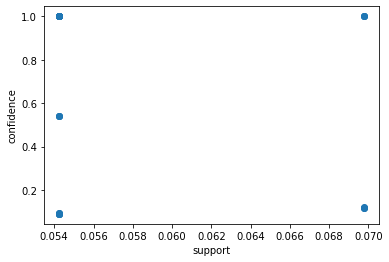

In [24]:
#可视化展示：绘制关联规则支持度和置信度的散点图
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(rules1.support,rules1.confidence)
plt.show()